In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("ProPadding.csv")

In [ ]:
df1.tail()

,TimeInSec,UplinkSum,UplinkCount,Uplink,DownlinkSum,DownlinkCount,Downlink
226329,2019-02-17 04:45:37,0.0,0,0,0.0,0,0
226330,2019-02-17 04:45:38,0.0,0,0,0.0,0,0
226331,2019-02-17 04:45:39,0.0,0,0,0.0,0,0
226332,2019-02-17 04:45:40,280.0,7,1,2376.0,7,1
226333,2019-02-17 04:45:41,0.0,0,0,122.0,2,1


In [ ]:
df1=df1[['UplinkCount','DownlinkCount']]

In [ ]:
len(df1)

226334

In [ ]:
Y=df1[['UplinkCount']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set=df1.values
target_set=Y.values
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [ ]:
df1=pd.DataFrame(training_set_scaled)
Y=pd.DataFrame(target_set_scaled)

In [ ]:
df_train=df1[0:181067]
df_test=df1[181067:]
df_target1=Y[0:181067]
df_target2=Y[181067:]

In [ ]:
train_set=df_train.values
target_set1=df_target1.values
X_test=df_test.values
y_test=df_target2.values

In [ ]:
X_train = []
y_train = []
for i in range(10,len(train_set)):
    X_train.append(train_set[i-10:i,:])
    y_train.append(target_set1[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(181057, 10, 2)
(181057, 1)


In [ ]:
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
def model():
    mod=Sequential()
    mod.add(LSTM(units = 100, return_sequences = False, input_shape = (X_train.shape[1], 2)))
    mod.add(Dropout(0.2))
    mod.add(Dense(32, kernel_initializer='normal', activation='relu'))
    mod.add(Dense(1, kernel_initializer='normal', activation='relu'))
    mod.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
    mod.summary()
    return mod

In [ ]:
RNN_model=model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 44,465
Trainable params: 44,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

callback=tf.keras.callbacks.ModelCheckpoint(filepath='./ProLSTM_1x10.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
history=RNN_model.fit(X_train, y_train,validation_split=0.25, epochs = 500, batch_size = 32,callbacks=[callback],shuffle=False)


Epoch 1/500
4244/4244 [==============================] - 41s 10ms/step - loss: 6.3973e-04 - mean_squared_error: 6.3973e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2/500
4244/4244 [==============================] - 40s 9ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/500
4244/4244 [==============================] - 41s 10ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 4/500
4244/4244 [==============================] - 43s 10ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 5/500
4244/4244 [==============================] - 40s 10ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 6/500
4244/4244 [==============================] - 41s 10ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - v

Epoch 48/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 49/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 50/500
4244/4244 [==============================] - 27s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 51/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 52/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 53/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - 

Epoch 95/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 96/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 97/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 98/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 99/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 100/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 -

4244/4244 [==============================] - 27s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 142/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 143/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 144/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 145/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 146/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 188/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 189/500
4244/4244 [==============================] - 27s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 190/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 191/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 192/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 234/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 235/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 236/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 237/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 238/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 280/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 281/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 282/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 283/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 284/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 27s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 326/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 327/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 328/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 329/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 330/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 372/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 373/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 374/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 375/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 376/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 418/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 419/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 420/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 421/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 422/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 464/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 465/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 466/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 467/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 468/500
4244/4244 [==============================] - 26s 6ms/step - loss: 6.3967e-04 - mean_squared_error: 6.3967e-04 - val_loss

In [ ]:
from tensorflow import keras
RNN_model = keras.models.load_model('ProLSTM_1x10.h5')

In [ ]:
testX = []
testY = []
for i in range(10,len(X_test)):
    testX.append(X_test[i-10:i,:])
    testY.append(y_test[i,:])
    
testX, testY = np.array(testX), np.array(testY)

In [ ]:
predicted = RNN_model.predict(testX)

In [ ]:
actual=sc.inverse_transform(testY)
predicted=sc.inverse_transform(predicted)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
error=mean_squared_error(actual,predicted)
error=sqrt(error)

In [ ]:
error

39.44307058001094

In [ ]:
error=mean_absolute_error(actual,predicted)

In [ ]:
error

10.679651766577546

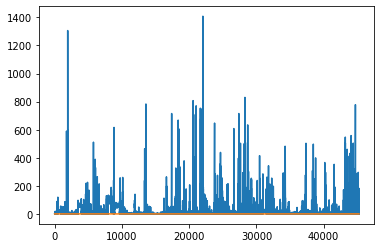

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(y_train[1000:2000])
#plt.plot(predicted[1000:2000])
plt.plot(actual)
plt.plot(predicted)
#plt.plot(y_train[500:700])
#plt.plot(predicted[500:700])
plt.show()

In [ ]:
pr=predicted.flatten()
ac=y_train.flatten()
result=ac.nonzero()
pr=pr[result]
ac=ac[result]
pr=sc.inverse_transform(pr.reshape(-1,1))
ac=sc.inverse_transform(ac.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ac,pr)

81.58133811300519

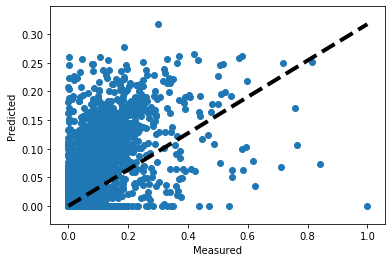

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [ ]:
df_test=df[61526:]
df_target_test=df_test[['UplinkCount']]
target_set_test=df_target_test.values
test_set=df_test.values

In [ ]:
X_test = []
y_test = []
for i in range(10,len(test_set)):
    X_test.append(test_set[i-10:i,:])
    y_test.append(target_set_test[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
predicted = RNN_model.predict(X_test)
#predicted = sc.inverse_transform(predicted)
print(predicted)

[[164.38983  ]
 [149.70863  ]
 [104.28204  ]
 ...
 [ 15.253096 ]
 [ 15.050789 ]
 [ 13.6225605]]


In [ ]:
print(target_set_test[10:])

[[104]
 [ 96]
 [113]
 ...
 [  3]
 [  7]
 [  0]]


In [ ]:
len(target_set_test)

15381

In [ ]:
len(predicted)

15371

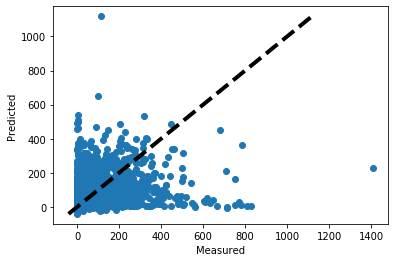

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(target_set_test[10:], predicted)
ax.plot([predicted.min(), predicted.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


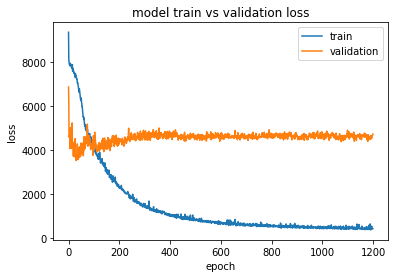

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
predicted2=np.where(predicted<0.0,0.0,predicted)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(target_set_test[10:],np.round(predicted2))

20.47043133172858